# ADS 502 Final Project
# 
## Heart Failure Detection
# 
### Team 4

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.tools.tools as stattools
import statsmodels.stats.outliers_influence as inf


from scipy import stats
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
url = 'https://raw.githubusercontent.com/dingyiduan7/ADS-502/main/ADS%20502%20Final_Project/heart_failure_clinical_records_dataset.csv'
heart = pd.read_csv(url)
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Exploratory Data Analysis (EDA)

Get a summary of the dataframe

In [4]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


First, check for missing data

In [5]:
heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Use skewness of histogram and boxplot to check for outliers

<AxesSubplot:ylabel='Frequency'>

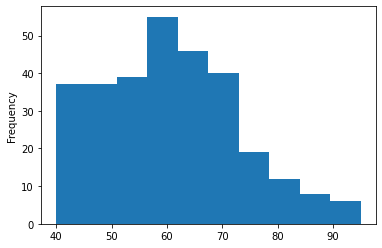

In [6]:
heart['age'].plot.hist()

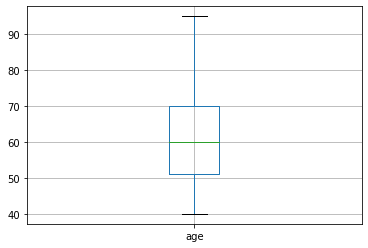

In [7]:
fig = plt.figure()
boxplot = heart.boxplot(column=['age'])

<AxesSubplot:ylabel='Frequency'>

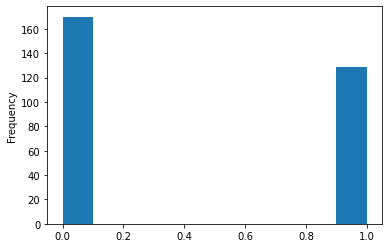

In [8]:
heart['anaemia'].plot.hist()

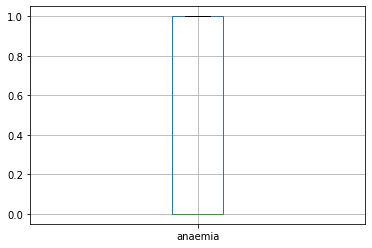

In [9]:
fig = plt.figure()
boxplot = heart.boxplot(column=['anaemia'])

<AxesSubplot:ylabel='Frequency'>

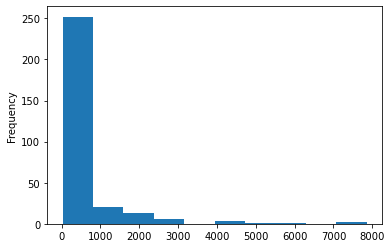

In [10]:
heart['creatinine_phosphokinase'].plot.hist()

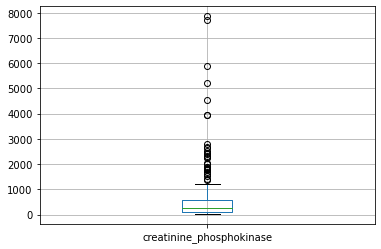

In [11]:
fig = plt.figure()
boxplot = heart.boxplot(column=['creatinine_phosphokinase'])

<AxesSubplot:ylabel='Frequency'>

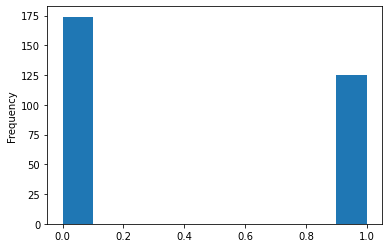

In [12]:
heart['diabetes'].plot.hist()

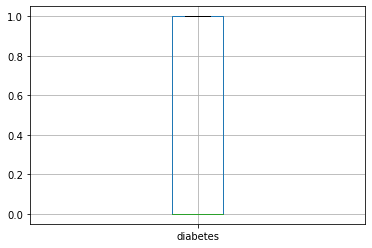

In [13]:
fig = plt.figure()
boxplot = heart.boxplot(column=['diabetes'])

<AxesSubplot:ylabel='Frequency'>

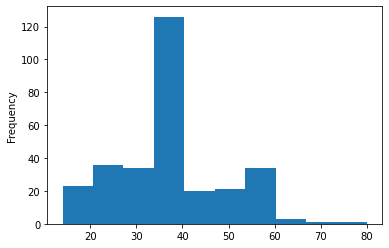

In [14]:
heart['ejection_fraction'].plot.hist()

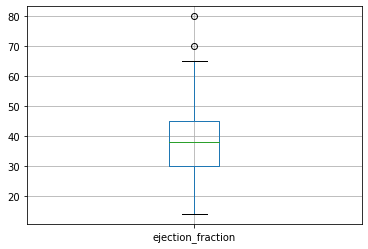

In [15]:
fig = plt.figure()
boxplot = heart.boxplot(column=['ejection_fraction'])

<AxesSubplot:ylabel='Frequency'>

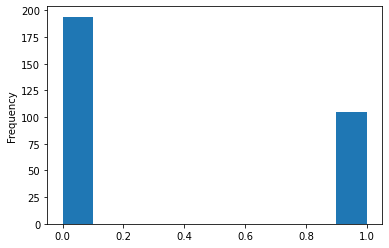

In [16]:
heart['high_blood_pressure'].plot.hist()

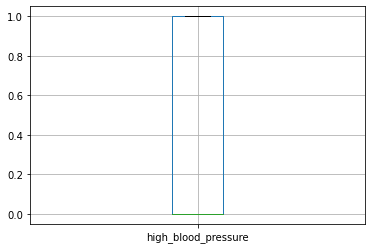

In [17]:
fig = plt.figure()
boxplot = heart.boxplot(column=['high_blood_pressure'])

<AxesSubplot:ylabel='Frequency'>

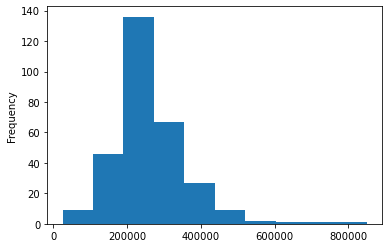

In [18]:
heart['platelets'].plot.hist()

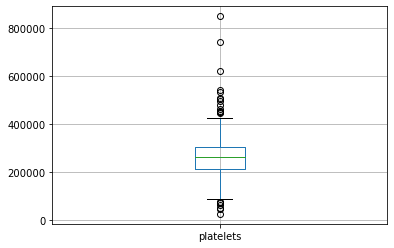

In [19]:
fig = plt.figure()
boxplot = heart.boxplot(column=['platelets'])

<AxesSubplot:ylabel='Frequency'>

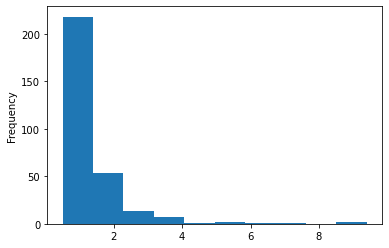

In [20]:
heart['serum_creatinine'].plot.hist()

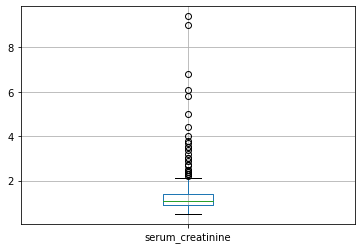

In [21]:
fig = plt.figure()
boxplot = heart.boxplot(column=['serum_creatinine'])

<AxesSubplot:ylabel='Frequency'>

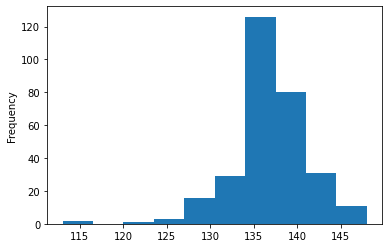

In [22]:
heart['serum_sodium'].plot.hist()

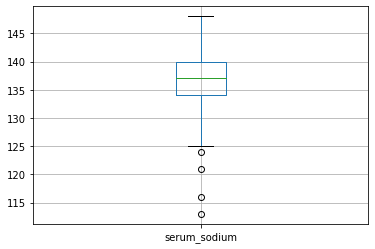

In [23]:
fig = plt.figure()
boxplot = heart.boxplot(column=['serum_sodium'])

<AxesSubplot:ylabel='Frequency'>

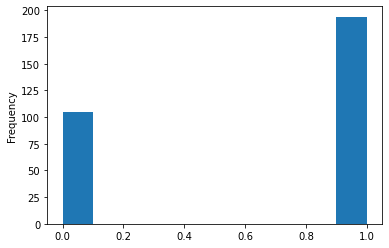

In [24]:
heart['sex'].plot.hist()

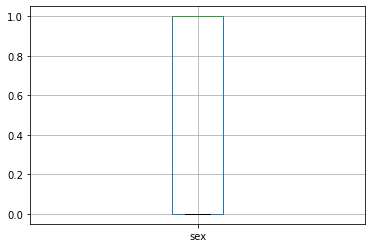

In [25]:
fig = plt.figure()
boxplot = heart.boxplot(column=['sex'])

<AxesSubplot:ylabel='Frequency'>

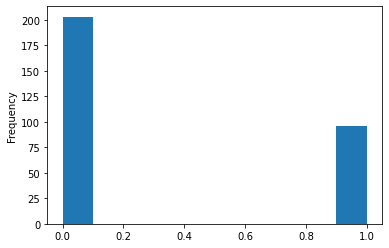

In [26]:
heart['smoking'].plot.hist()

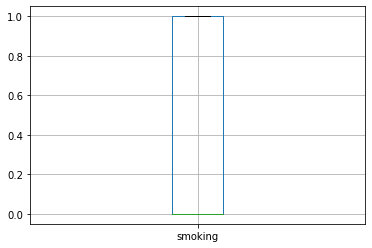

In [27]:
fig = plt.figure()
boxplot = heart.boxplot(column=['smoking'])

<AxesSubplot:ylabel='Frequency'>

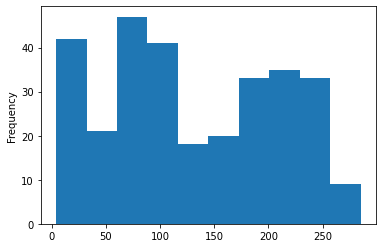

In [28]:
heart['time'].plot.hist()

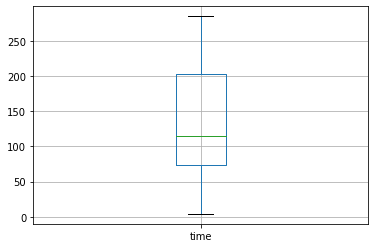

In [29]:
fig = plt.figure()
boxplot = heart.boxplot(column=['time'])

Based on the skewness and boxplot, we've decided to replace the outliers with median value in for these variables:
#### creatinine_phosphokinase
#### ejection_fraction
#### platelets
#### serum_creatinine
#### serum_sodium

Make a subset of above variables

In [30]:
heart_var = heart[["creatinine_phosphokinase", "ejection_fraction","platelets","serum_creatinine","serum_sodium"]]

In [31]:
heart.drop(["creatinine_phosphokinase", "ejection_fraction","platelets","serum_creatinine","serum_sodium"], axis=1, inplace=True)
heart.head()

,age,anaemia,diabetes,high_blood_pressure,sex,smoking,time,DEATH_EVENT
0,75.0,0,0,1,1,0,4,1
1,55.0,0,0,0,1,0,6,1
2,65.0,0,0,0,1,1,7,1
3,50.0,1,0,0,1,0,7,1
4,65.0,1,1,0,0,0,8,1


In [32]:
heart_var.head()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,582,20,265000.00,1.9,130
1,7861,38,263358.03,1.1,136
2,146,20,162000.00,1.3,129
3,111,20,210000.00,1.9,137
4,160,20,327000.00,2.7,116


Replace outliers with median values

In [33]:
for col in heart_var:   
    
    q3 = np.percentile(heart_var[col], 75)
    q1 = np.percentile(heart_var[col], 25)
    iqr = q3 - q1
    
    lower = q1 -(1.5 * iqr) 
    upper = q3 +(1.5 * iqr)
    
    med = heart_var[col].median()

    heart_var[col] = np.where((heart_var[col] >= upper), med ,heart_var[col]) 
    
    heart_var[col] = np.where((heart_var[col] <= lower), med ,heart_var[col])

In [34]:
heart = pd.concat([heart_var, heart], axis=1, join='inner')

In [35]:
heart.head()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,age,anaemia,diabetes,high_blood_pressure,sex,smoking,time,DEATH_EVENT
0,582.0,20.0,265000.00,1.9,130.0,75.0,0,0,1,1,0,4,1
1,250.0,38.0,263358.03,1.1,136.0,55.0,0,0,0,1,0,6,1
2,146.0,20.0,162000.00,1.3,129.0,65.0,0,0,0,1,1,7,1
3,111.0,20.0,210000.00,1.9,137.0,50.0,1,0,0,1,0,7,1
4,160.0,20.0,327000.00,1.1,137.0,65.0,1,1,0,0,0,8,1


Check for outliers again

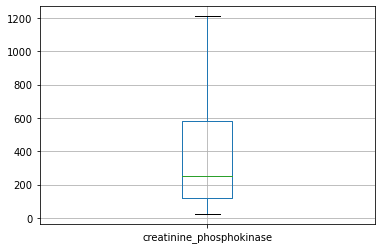

In [36]:
fig = plt.figure()
boxplot = heart.boxplot(column=['creatinine_phosphokinase'])

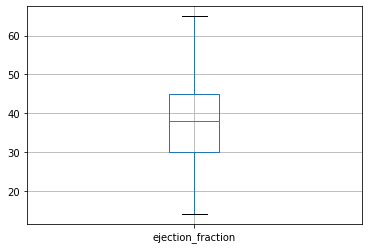

In [37]:
fig = plt.figure()
boxplot = heart.boxplot(column=['ejection_fraction'])

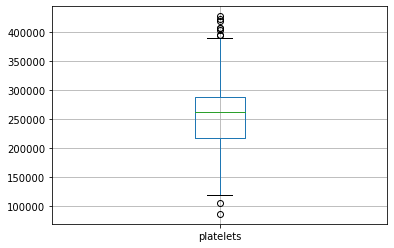

In [38]:
fig = plt.figure()
boxplot = heart.boxplot(column=['platelets'])

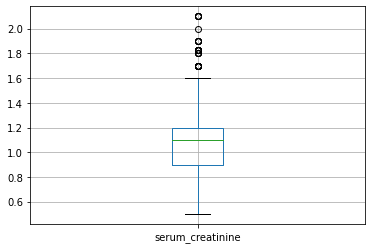

In [39]:
fig = plt.figure()
boxplot = heart.boxplot(column=['serum_creatinine'])

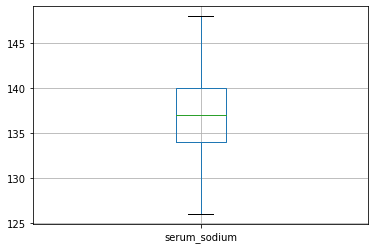

In [40]:
fig = plt.figure()
boxplot = heart.boxplot(column=['serum_sodium'])

Use barchart to look at the relationships between categorical features and DEATH_EVENT. Categorical features include:
#### anaemia
#### diabetes
#### high_blood_pressure
#### sex
#### smoking

#### Normally, for categorical data, the values should be strings instead of '0' and '1'. If then we would perform add dummy variables so the attributes can be used for model building. But the dataset comes in binary format, so we skip that step.

Raw barcharts vs Normalized barcharts

<AxesSubplot:xlabel='anaemia'>

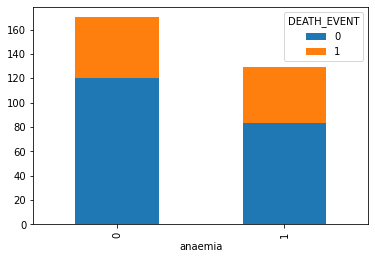

In [41]:
crosstab_anaemia = pd.crosstab(heart['anaemia'], heart['DEATH_EVENT'])
crosstab_anaemia.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='anaemia'>

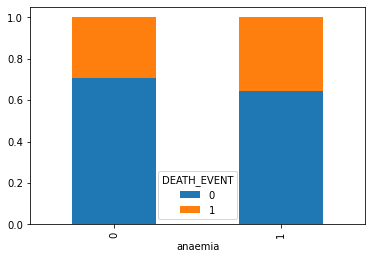

In [42]:
crosstab_norm_anaemia = crosstab_anaemia.div(crosstab_anaemia.sum(axis=1), axis = 0)
crosstab_norm_anaemia.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='diabetes'>

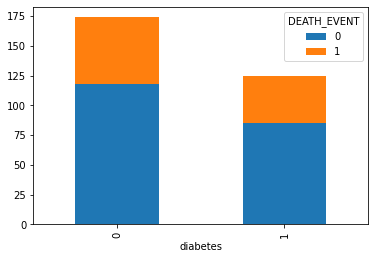

In [43]:
crosstab_diabetes = pd.crosstab(heart['diabetes'], heart['DEATH_EVENT'])
crosstab_diabetes.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='diabetes'>

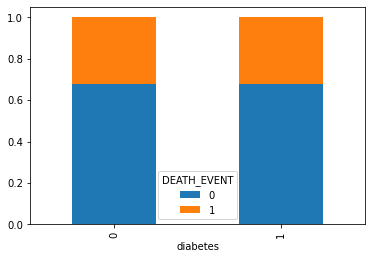

In [44]:
crosstab_norm_diabetes = crosstab_diabetes.div(crosstab_diabetes.sum(axis=1), axis = 0)
crosstab_norm_diabetes.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='high_blood_pressure'>

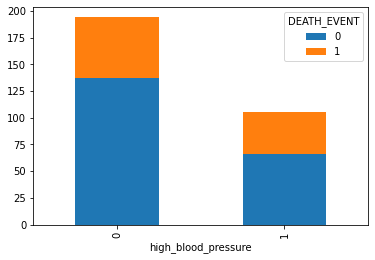

In [45]:
crosstab_high_blood_pressure = pd.crosstab(heart['high_blood_pressure'], heart['DEATH_EVENT'])
crosstab_high_blood_pressure.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='high_blood_pressure'>

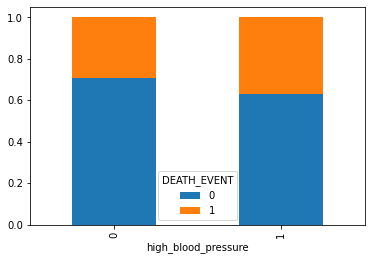

In [46]:
crosstab_norm_high_blood_pressure = crosstab_high_blood_pressure.div(crosstab_high_blood_pressure.sum(axis=1), axis = 0)
crosstab_norm_high_blood_pressure.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='sex'>

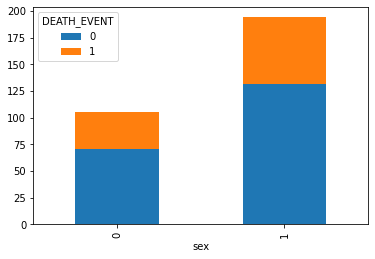

In [47]:
crosstab_sex = pd.crosstab(heart['sex'], heart['DEATH_EVENT'])
crosstab_sex.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='sex'>

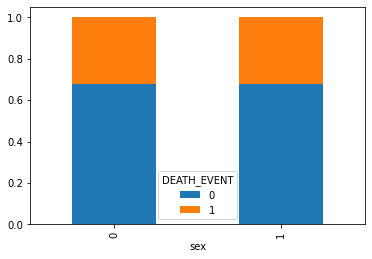

In [48]:
crosstab_norm_sex = crosstab_sex.div(crosstab_sex.sum(axis=1), axis = 0)
crosstab_norm_sex.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='smoking'>

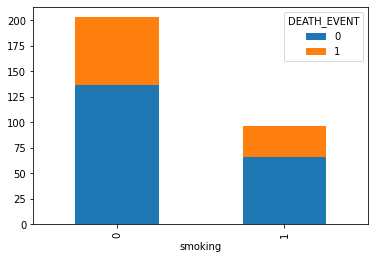

In [49]:
crosstab_smoking = pd.crosstab(heart['smoking'], heart['DEATH_EVENT'])
crosstab_smoking.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='smoking'>

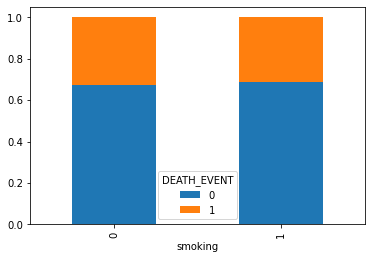

In [50]:
crosstab_norm_smoking = crosstab_smoking.div(crosstab_smoking.sum(axis=1), axis = 0)
crosstab_norm_smoking.plot(kind='bar', stacked = True)

From the above barcharts we can tell that besides having anaemia and high blood pressure is more likely to cause death; the rest of attributes does not necessarily indicate a death event.

#### Check for multicollinearity.

In [51]:
X = pd.DataFrame(heart[['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine',
                       'serum_sodium','age','anaemia','diabetes','high_blood_pressure','sex','smoking','time']])

[Text(0.5, 0, 'creatinine_phosphokinase'),
 Text(1.5, 0, 'ejection_fraction'),
 Text(2.5, 0, 'platelets'),
 Text(3.5, 0, 'serum_creatinine'),
 Text(4.5, 0, 'serum_sodium'),
 Text(5.5, 0, 'age'),
 Text(6.5, 0, 'anaemia'),
 Text(7.5, 0, 'diabetes'),
 Text(8.5, 0, 'high_blood_pressure'),
 Text(9.5, 0, 'sex'),
 Text(10.5, 0, 'smoking'),
 Text(11.5, 0, 'time')]

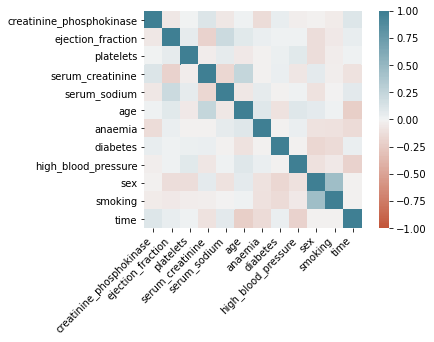

In [52]:
corr = X.corr(method='pearson')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [53]:
X.corr()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,age,anaemia,diabetes,high_blood_pressure,sex,smoking,time
creatinine_phosphokinase,1.000000,-0.067257,0.004120,0.111241,-0.069762,0.009850,-0.140354,0.046520,-0.026001,-0.023429,-0.039783,0.105010
ejection_fraction,-0.067257,1.000000,0.054128,-0.199611,0.197044,0.084025,0.032626,0.013359,0.021615,-0.124140,-0.054775,0.045928
platelets,0.004120,0.054128,1.000000,-0.038749,0.054843,-0.053858,-0.017397,0.030895,0.078735,-0.124587,-0.038568,0.012067
serum_creatinine,0.111241,-0.199611,-0.038749,1.000000,-0.166704,0.249123,-0.011042,0.033689,-0.072018,0.065473,-0.028481,-0.097407
serum_sodium,-0.069762,0.197044,0.054843,-0.166704,1.000000,-0.065669,0.048716,-0.014613,0.011385,-0.091244,-0.001238,0.072922
age,0.009850,0.084025,-0.053858,0.249123,-0.065669,1.000000,0.088006,-0.101012,0.093289,0.065430,0.018668,-0.224068
anaemia,-0.140354,0.032626,-0.017397,-0.011042,0.048716,0.088006,1.000000,-0.012729,0.038182,-0.094769,-0.107290,-0.141414
diabetes,0.046520,0.013359,0.030895,0.033689,-0.014613,-0.101012,-0.012729,1.000000,-0.012732,-0.157730,-0.147173,0.033726
high_blood_pressure,-0.026001,0.021615,0.078735,-0.072018,0.011385,0.093289,0.038182,-0.012732,1.000000,-0.104615,-0.055711,-0.196439
sex,-0.023429,-0.124140,-0.124587,0.065473,-0.091244,0.065430,-0.094769,-0.157730,-0.104615,1.000000,0.445892,-0.015608


In [54]:
X.corr()[abs(X.corr())>=0.5]

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,age,anaemia,diabetes,high_blood_pressure,sex,smoking,time
creatinine_phosphokinase,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ejection_fraction,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platelets,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
serum_creatinine,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
serum_sodium,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
anaemia,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
diabetes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
high_blood_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


No Multicollinearity.

### Partition the data and possible resampling.

75% is training set, 25% is test sets

In [55]:
heart_train, heart_test = train_test_split(heart, test_size = 0.25, random_state = 7)

In [56]:
print('Total number of records: ', heart.shape[0])

Total number of records:  299


In [57]:
print("Number of training record is {} and has proportion of {}%".format(heart_train.shape[0], 
                                                                        round(100*heart_train.shape[0]/heart.shape[0],2)))

Number of training record is 224 and has proportion of 74.92%


In [58]:
print("Number of test record is {} and has proportion of {}%".format(heart_test.shape[0], 
                                                                        round(100*heart_test.shape[0]/heart.shape[0],2)))

Number of test record is 75 and has proportion of 25.08%


<BarContainer object of 2 artists>

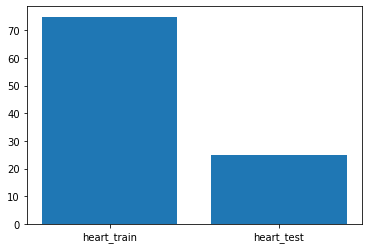

In [59]:
names = ['heart_train', 'heart_test']
percent = [round(100*heart_train.shape[0]/heart.shape[0],2), round(100*heart_test.shape[0]/heart.shape[0],2)]
plt.bar(names, percent)

Check for proportion of target variable (death event counts) 

In [60]:
# Training set
heart_train['DEATH_EVENT'].value_counts(normalize=True)

0    0.651786
1    0.348214
Name: DEATH_EVENT, dtype: float64

This shows the proportion of target variable is 34% (death events), no resampling needed.

In [61]:
heart_test['DEATH_EVENT'].value_counts(normalize=True)

0    0.76
1    0.24
Name: DEATH_EVENT, dtype: float64

This shows the proportion of target variable is 24% (death events), no resampling needed.

### Model Building

In [62]:
for col in heart_train.columns:
    print(col)

creatinine_phosphokinase
ejection_fraction
platelets
serum_creatinine
serum_sodium
age
anaemia
diabetes
high_blood_pressure
sex
smoking
time
DEATH_EVENT


In [63]:
X_train = heart_train[['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium',
           'age','anaemia','diabetes','high_blood_pressure','sex','smoking']]
y_train = heart_train[['DEATH_EVENT']]

In [64]:
X_test = heart_test[['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium',
           'age','anaemia','diabetes','high_blood_pressure','sex','smoking']]
y_test = heart_test[['DEATH_EVENT']]

In [65]:
# Standardization/Normalization??
#X_train = pd.DataFrame(stats.zscore(X_train), columns=X_train.columns)
y_train['DEATH_EVENT'] = (y_train['DEATH_EVENT']).astype(str)
y_test['DEATH_EVENT'] = (y_test['DEATH_EVENT']).astype(str)


C5.0
CART
Logistic Regression
Random Forest
Naive Bayes
Neural Network

#### C5.0

[Text(992.0, 951.3000000000001, 'serum_creatinine <= 0.95\nentropy = 0.932\nsamples = 224\nvalue = [146, 78]\nclass = 0'),
 Text(496.0, 679.5, 'ejection_fraction <= 27.5\nentropy = 0.561\nsamples = 61\nvalue = [53, 8]\nclass = 0'),
 Text(248.0, 407.70000000000005, 'entropy = 0.918\nsamples = 6\nvalue = [2, 4]\nclass = 1'),
 Text(744.0, 407.70000000000005, 'entropy = 0.376\nsamples = 55\nvalue = [51, 4]\nclass = 0'),
 Text(1488.0, 679.5, 'age <= 71.0\nentropy = 0.986\nsamples = 163\nvalue = [93, 70]\nclass = 0'),
 Text(1240.0, 407.70000000000005, 'entropy = 0.934\nsamples = 123\nvalue = [80, 43]\nclass = 0'),
 Text(1736.0, 407.70000000000005, 'ejection_fraction <= 47.5\nentropy = 0.91\nsamples = 40\nvalue = [13, 27]\nclass = 1'),
 Text(1488.0, 135.89999999999998, 'entropy = 0.722\nsamples = 30\nvalue = [6, 24]\nclass = 1'),
 Text(1984.0, 135.89999999999998, 'entropy = 0.881\nsamples = 10\nvalue = [7, 3]\nclass = 0')]

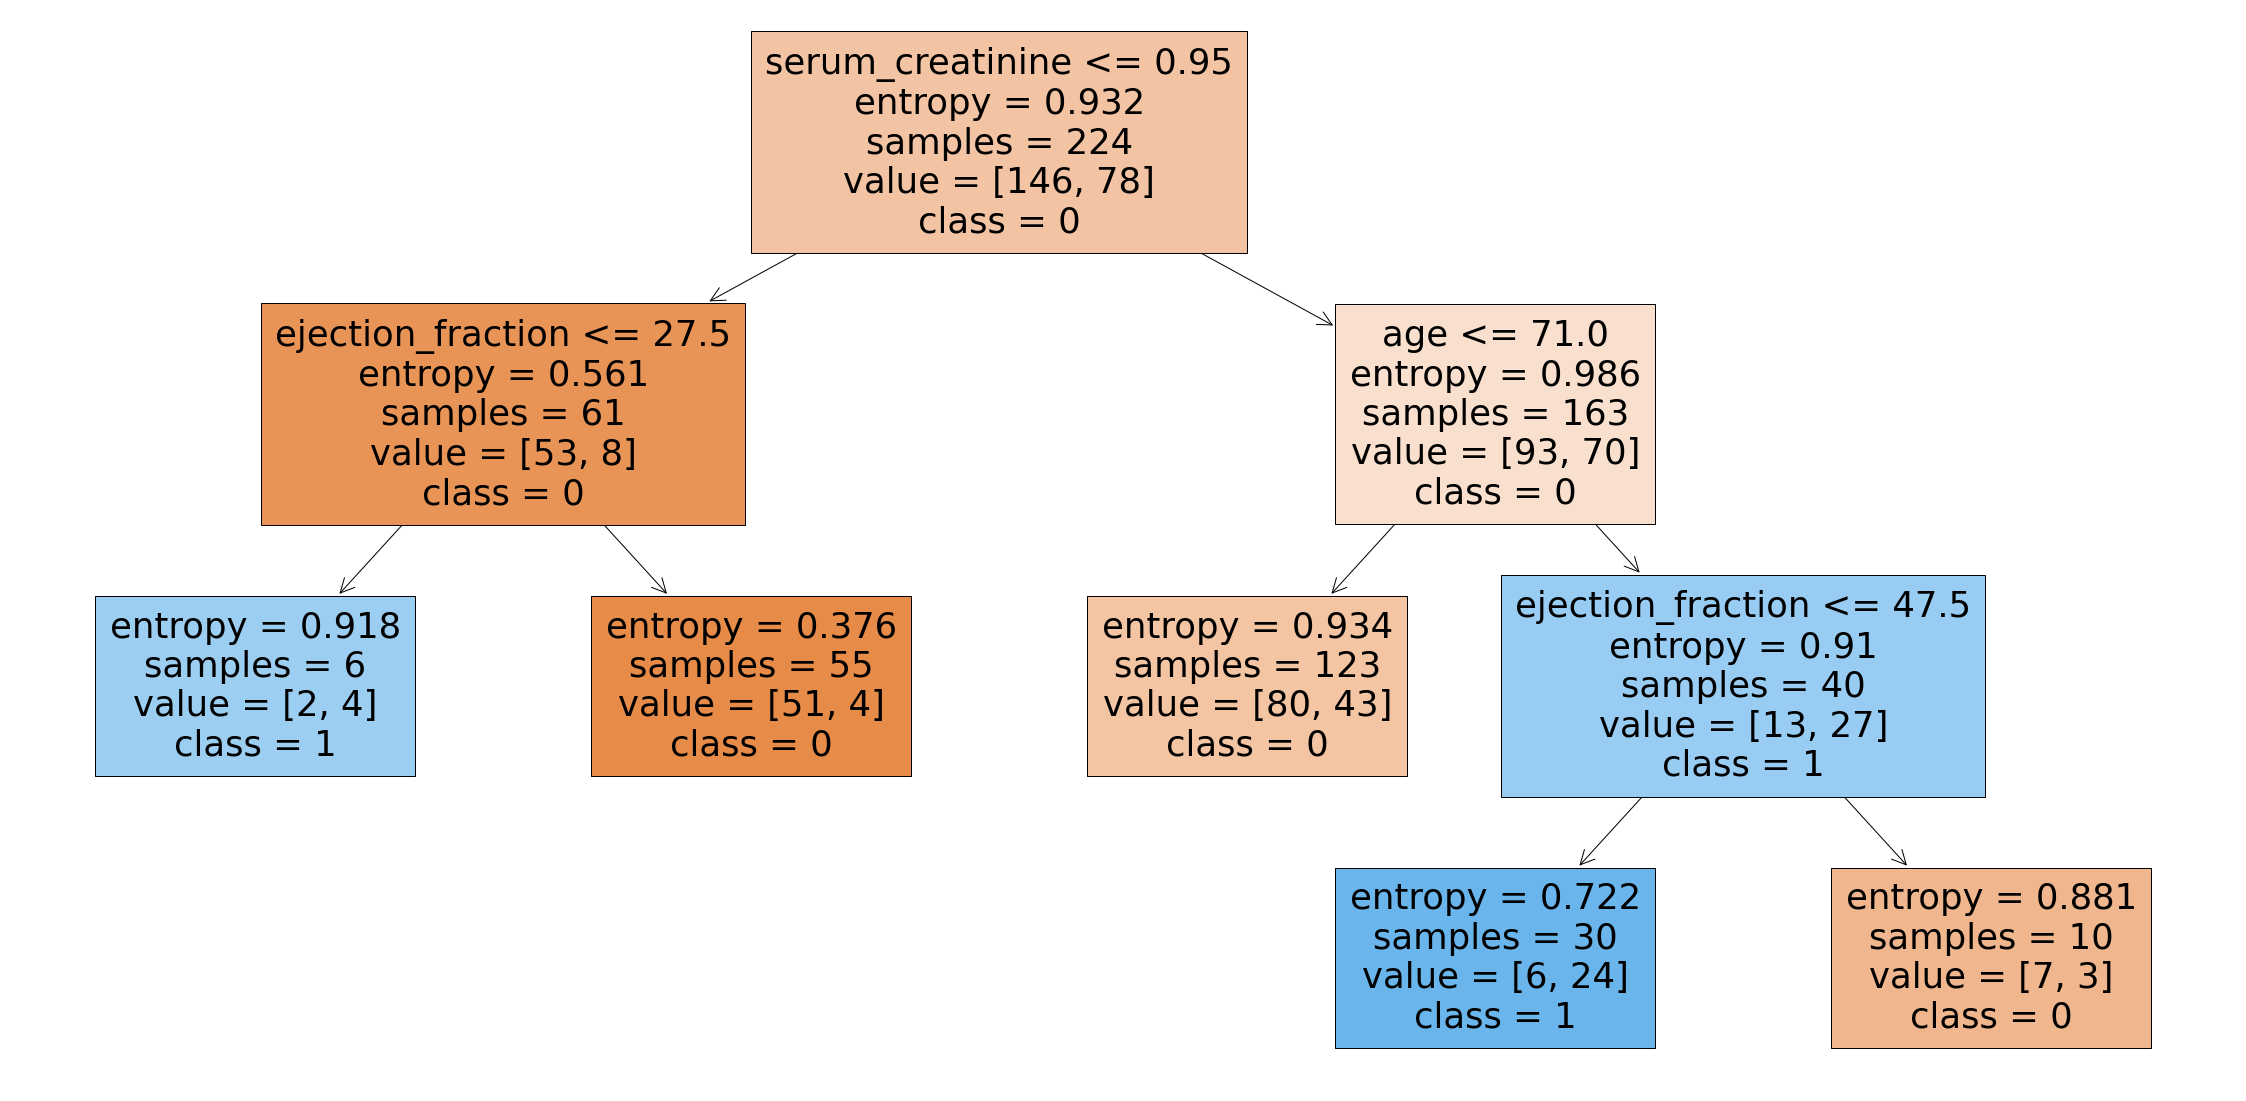

In [66]:
C5_train = DecisionTreeClassifier(criterion='entropy', min_samples_split=20, max_leaf_nodes=5).fit(X_train, y_train)
plt.figure(figsize=(40,20))
plot_tree(C5_train,
          feature_names = X_train.columns, 
          class_names = y_train['DEATH_EVENT'].unique(),
          filled=True
          )

In [67]:
C5_test = DecisionTreeClassifier(criterion='entropy', min_samples_split=20, max_leaf_nodes=5).fit(X_test, y_test)

#### C5.0 Evaluation

In [68]:
ytrue_test = y_test['DEATH_EVENT']
ypred_test = C5_test.predict(X_test)
cm = confusion_matrix(ytrue_test,ypred_test)
cm

array([[54,  3],
       [ 2, 16]], dtype=int64)

In [69]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
TPN = TN + FN
TPP = FP + TP
TAN = TN + FP
TAP = FN + TP
GT = TN + FN + FP + TP
Precision = TP/TPP
Recall = TP/TAP

print('TN: ', TN,
      '\nFP: ', FP,
      '\nFN: ', FN,
      '\nTP: ', TP,
      '\nTPN: ', TPN,
      '\nTPP: ', TPP,
      '\nTAN: ', TAN,
      '\nTAP: ', TAP,
      '\nGT: ', GT,
     )

TN:  54 
FP:  3 
FN:  2 
TP:  16 
TPN:  56 
TPP:  19 
TAN:  57 
TAP:  18 
GT:  75


In [70]:
print("Accuracy for C5.0 model is: ",round(((TN+TP)/GT),4),
     '\nError Rate for C5.0 model is: ', round(1-(TN+TP)/GT,4),
     '\nSensitivity of C5.0 model is: ', round(TP/TAP,4),
      '\nSpecificity of C5.0 model is: ', round(TN/TAN,4),
      '\nPrecision of C5.0 model is: ', round(TP/TPP,4),
     )
      

Accuracy for C5.0 model is:  0.9333 
Error Rate for C5.0 model is:  0.0667 
Sensitivity of C5.0 model is:  0.8889 
Specificity of C5.0 model is:  0.9474 
Precision of C5.0 model is:  0.8421
